In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/nanthasnk/Black-Friday-Sales-Prediction/master/Data/BlackFridaySales.csv")


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

<ipython-input-71-dff151576d5b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Purchase"],color='b')


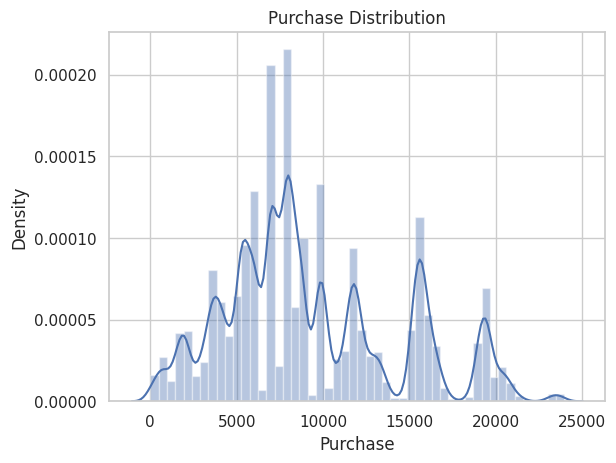

In [ ]:
sns.distplot(data["Purchase"],color='b')
plt.title("Purchase Distribution")
plt.show()


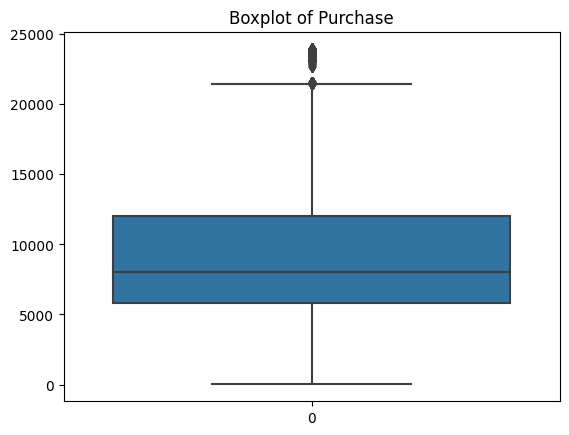

In [ ]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [ ]:
df['Purchase'].skew()

0.6001400037087128

In [ ]:
#The purchase column is right skewed

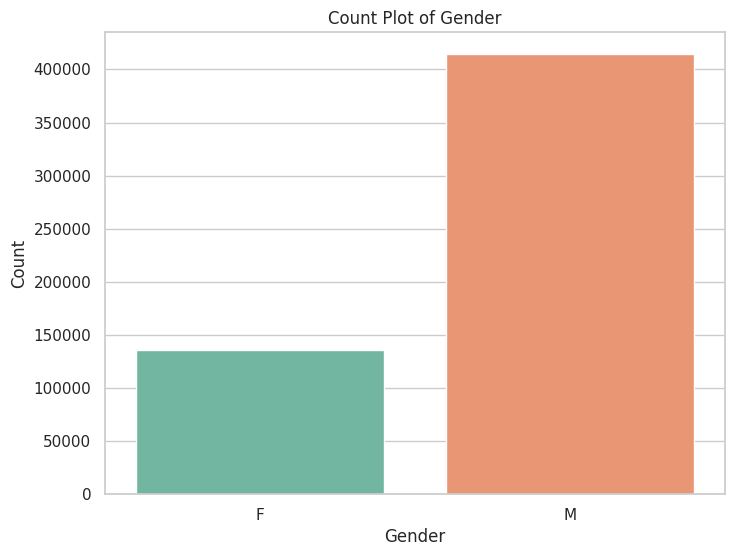

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette="Set2")

plt.title("Count Plot of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

This calculation shows there are more male purchases than female ones

In [ ]:
df['Gender'].value_counts(normalize = True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

On average a male spends more than the female

In [ ]:
data.groupby("Gender").mean()["Purchase"]

<ipython-input-20-b2e65a1fdba5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Gender").mean()["Purchase"]


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

City Purchases

In [ ]:
#The below countplot shows that CIty B has the highest number of purchases

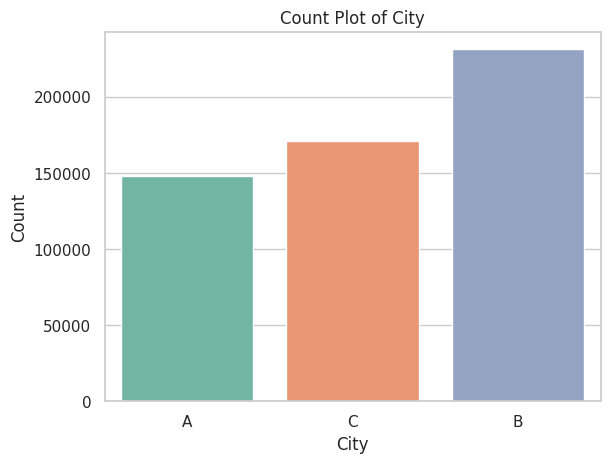

In [ ]:
sns.countplot(x = 'City_Category',data =df,palette="Set2")
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Count Plot of City")
plt.show()

However City C has the buyers who spend the most

<ipython-input-24-58626dcd7ac5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')


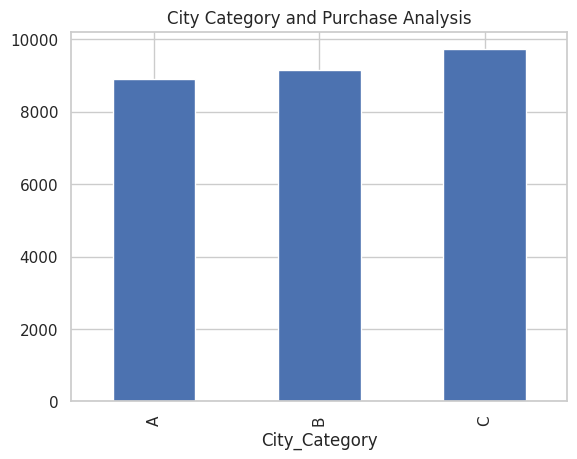

In [ ]:
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()


Age group of 26-35 makes the most number of purchases

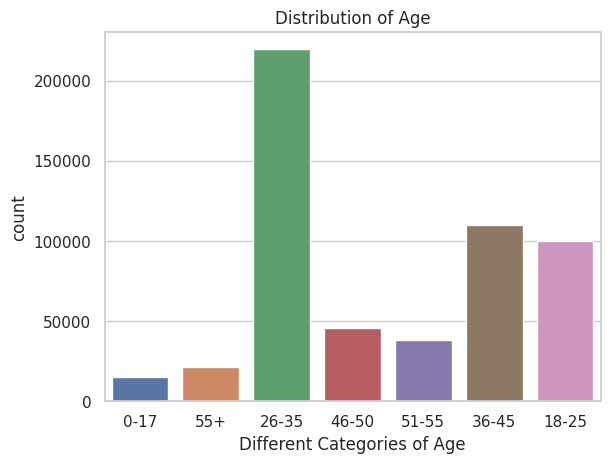

In [ ]:
sns.countplot(x = 'Age',data =df)
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

<ipython-input-28-784646854793>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Age").mean()["Purchase"].plot(kind='bar')


<Axes: xlabel='Age'>

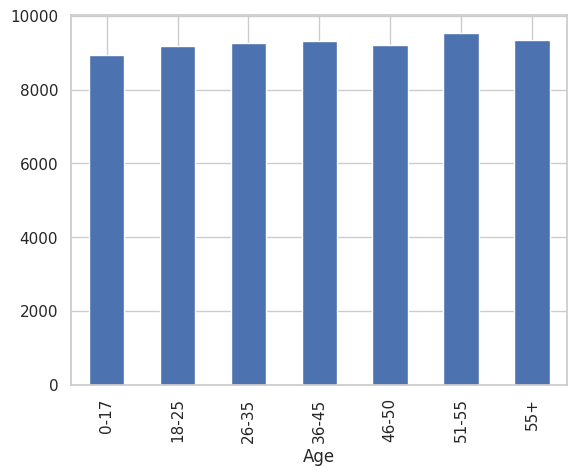

In [ ]:
#This countplot shows that mean puchase rate between the age groups tends
#to be the same except that the 51-55 age group has a little higher average purchase amount.
df.groupby("Age").mean()["Purchase"].plot(kind='bar')



Product_Category_1

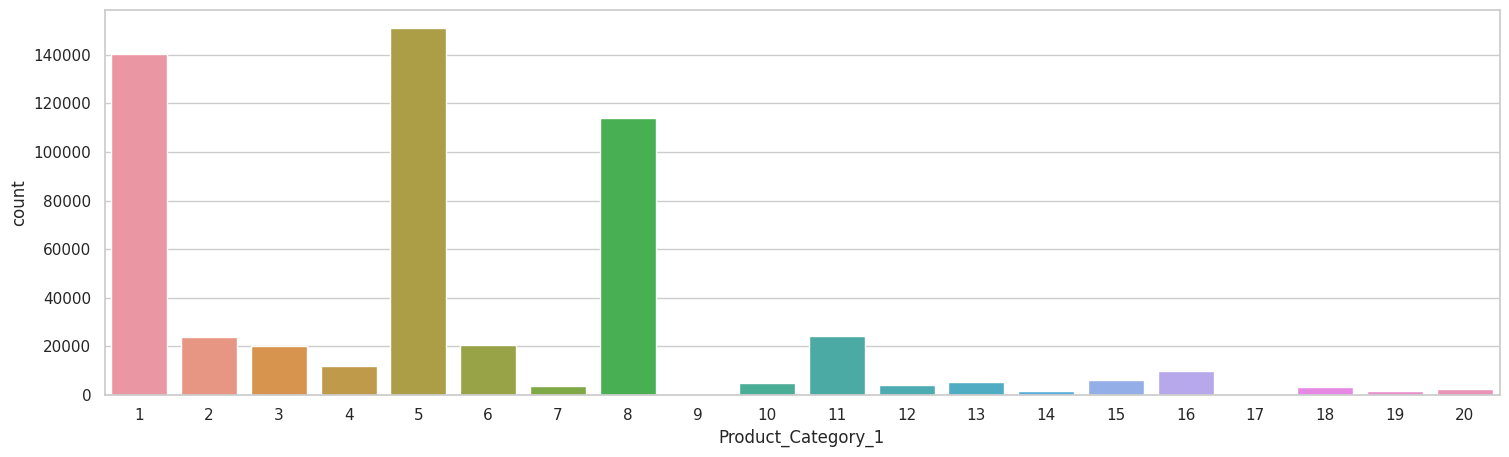

In [ ]:
#The plot shows that product 1,5,8 clearly stand out.
plt.figure(figsize=(18,5))
sns.countplot(x= 'Product_Category_1',data = df)
plt.show()

In [ ]:
df.corr

<bound method DataFrame.corr of        Product_ID Gender    Age  Occupation City_Category  \
0       P00069042      F   0-17          10             A   
1       P00248942      F   0-17          10             A   
2       P00087842      F   0-17          10             A   
3       P00085442      F   0-17          10             A   
4       P00285442      M    55+          16             C   
...           ...    ...    ...         ...           ...   
550063  P00372445      M  51-55          13             B   
550064  P00375436      F  26-35           1             C   
550065  P00375436      F  26-35          15             B   
550066  P00375436      F    55+           1             C   
550067  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2               

<ipython-input-33-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


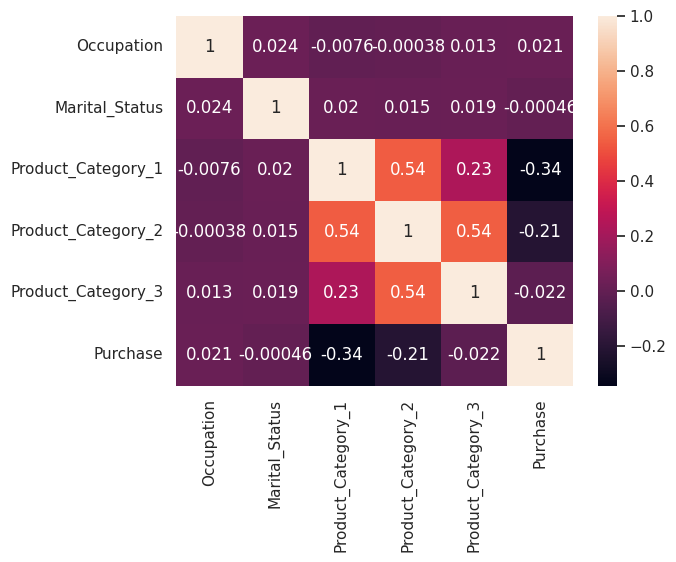

In [ ]:

sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.columns
df.head()


,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,0,0,8370,0,0,1,0,0
1,0,0,10,0,0,1,6,14,15200,0,0,1,0,0
2,0,0,10,0,0,12,0,0,1422,0,0,1,0,0
3,0,0,10,0,0,12,14,0,1057,0,0,1,0,0
4,1,6,16,2,0,8,0,0,7969,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,0,0,368,0,1,0,0,0
550064,0,2,1,2,0,20,0,0,371,0,0,0,1,0
550065,0,2,15,1,1,20,0,0,137,0,0,0,0,1
550066,0,6,1,2,0,20,0,0,365,0,0,1,0,0


In [ ]:
df.drop('Product_ID',axis=1)
df.head()


,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,P00069042,0,0,10,0,0,3,0,0,8370,0,0,1,0,0
1,P00248942,0,0,10,0,0,1,6,14,15200,0,0,1,0,0
2,P00087842,0,0,10,0,0,12,0,0,1422,0,0,1,0,0
3,P00085442,0,0,10,0,0,12,14,0,1057,0,0,1,0,0
4,P00285442,1,6,16,2,0,8,0,0,7969,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [ ]:
df['Gender'] = lr.fit_transform(df['Gender'])
df['Age'] = lr.fit_transform(df['Age'])
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [ ]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

Splitting data into independent and dependent variables

In [ ]:
X = df.drop("Purchase",axis=1)
y=df['Purchase']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import  r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.15060563762335477


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(random_state = 0)

In [ ]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
rf_y_pred = RFregressor.predict(X_test)

In [ ]:
r2_score(y_test, rf_y_pred)

0.6274061067067545